# Enoncé du problème

L'objectif de ce projet est d'estimer la longueur de câble sous-marin nécessaire pour relier deux côtes $A$ et $B$  en utilisant des simulations conditionnelles.


Le câble reposera sur le fond marin dont la profondeur est inconnue.
Le segment $[AB]$ est discrétisé par une séquence de (N+1) points. On pose $x_0=A$ et pour $i=1,\dots,N$, $$x_i=x_0+i\Delta$$ où $$\Delta = \frac{AB}{N}$$ de telle sorte que $x_N=B$.
On note $z(x)$ la profondeur du fond marin au point $x$ de telle sorte 
qu'on pourra estimer la longueur totale de câble nécessaire par la somme 
des longueurs sur les segments de la discrétisation :

$$l=\sum_{i=1}^N\sqrt{\Delta^2+(z(x_i)-z(x_{i-1}))^2}.$$

Enfin, notons que l'on dispose d'un ensemble de $n$ observations de la 
profondeur que l'on supposera situées sur des points de discrétisation $z(x_{j_1}),\dots,z(x_{j_n})$.


On adopte un modèle probabiliste pour la profondeur. On suppose que le vecteur des 
profondeurs sur les points de discrétisation 
$\mathbf{z}=(z(x_0),\dots,z(x_N))$ est la réalisation
d'un vecteur aléatoire gaussien $\mathbf{Z}=(Z(x_0),\dots,Z(x_N))$ 
dont le vecteur d'espérance ne contient qu'une seule valeur $\mu$ 
répétée $N+1$ fois et dont la matrice de covariance $\Sigma$ a pour termes $\sigma_{ij}$
définis par $\sigma_{ij}=C(|x_i-x_j|)$ où $C$ est une
fonction décroissante, traduisant le fait que deux points 
géographiquement proches ont tendance à avoir des profondeurs plus similaires que deux points éloignés.

On supposera que la matrice de covariance ainsi 
générée est définie-positive (en fait, $C$ sera choisie parmi les fonctions qui, 
appliquées aux termes d'une matrice de distance, produisent des matrices définie-positives). 

Si on note $L$ la variable aléatoire donnant la longueur de cable nécessaire : 
$$L=\sum_{i=1}^N\sqrt{\Delta^2+(Z(x_i)-Z(x_{i-1}))^2},$$
un bon estimateur de $L$ est fourni par l'espérance conditionnelle 

$$L^\star=E[L|Z(x_{j_1})=z(x_{j_1}),\dots,Z(x_{j_n})=z(x_{j_n})].$$
                                                                              
Cependant, cette quantité est difficilement accessible par le calcul. 
On va donc avoir recours à des
simulations conditionnelles. C'est-à-dire que l'on va simuler 
un nombre $K$ de réalités (disons des réalisations du modèle 
probabiliste choisi), et sur chacune d'entre elle, 
la quantité de câble nécessaire sera évaluée. 
On disposera ainsi d'un échantillon $l_{(1)},\dots,l_{(K)}$ de 
longueures simulées. Puis on approchera l'espérance conditionnelle  par 
$$L^\star=\frac{1}{K}\sum_{k=1}^K l_{(k)}.$$

L'objectif de ce projet est donc d'écrire un code permettant 
d'effectuer cette simulation conditionnelle, puis de l'appliquer 
au jeu de données fourni et d'en déduire une estimation de la longueur de câble nécessaire.

# Questions théoriques

1. Quel théorème du cours nous autorise-t-il à estimer l'espérance conditionnelle par la moyenne empirique de simulations conditionnelles ?

2. Rappeler la loi conditionnelle du vecteur des composantes de $\mathbf{Z}$ correspondant aux points de discrétisation
sans observation, connaissant les valeurs prises par les composantes aux sites d'observation.

3. Si $\mathbf{Y}=(Y_1,\dots,Y_p)$ est un vecteur de composantes gaussiennes indépendantes, toutes d'espérance nulle et de variance 1, 
quelle est la loi du vecteur $\mathbf{Z}=m+R\mathbf{Y}$ où $R$ est une matrice $p\times p$ et $m$ est un vecteur de taille $p$ ?

4. En déduire un algorithme de simulation conditionnelle.

1 : La loi forte des grands nombres nous permet d'estimer l'espérance conditionnelle par la moyenne empirique de simulations conditionnelles.

2 : On note $X$ le vecteur gaussien correspondant aux points de discrétisation sans observation, et $Y$ le vecteur gaussien correspondant aux points observés. D'après le cours,

$\mathbf{P}_{X|Y=y} (x)= \frac{1}{(2\pi)^\frac{k}{2} \sqrt{det(CS_Y)}} exp(-\frac{1}{2} (x-\psi (y))^t C S_{Y}^{-1} (x-\psi (y) ) ) )$

avec $C S_Y = C_Y - C_{X,Y}C_Y^{-1} C_{Y,X}$   
où   $C_X = Cov(X, X)$, $C_Y = Cov(Y, Y)$, $C_{X,Y} = Cov(X, Y)$

3 : $Y$ est centrée réduite donc le vecteur $Z$ suit une loi normale d'espérance $m$ et de matrice de covariance $RR^{t}$ d'après le cours (simulation d'un vecteur gaussien).

4 : Pour simuler un vecteur gaussien $Z = (z_1, ... , z_k)$ d'espérance $0$ et de matrice de covariance l'identité, on peut utiliser la méthode de Box-Muller pour simuler $n$ variables aléatoires gaussiennes centrées, réduites et indépendantes qui forment les $z_i$. Puis on utilise la relation ci-dessus pour nous ramener à un vecteur ayant l'espérance et la matrice de covariance que l'on souhaite.
En l'occurence, pour simuler la loi conditionnelle de $X$ sachant $Y=y$ il faut prendre pour espérance $m_{X|Y=y}=\psi(y) = m_x + C_{X,Y}C^{-1}_Y(y-m_Y)$
et pour matrice de covariance $C_Y - C_{X,Y}C_Y^{-1} C_{Y,X}$.

# Données du problème
Conventionnellement, $A$ est l'origine, $B=500$, $N=100$.

Les données $$\begin{array}{c|r}i & z(x_i)\\
\hline
0 & 0\\
20 & -4\\
40 & -12.8\\
60 & -1\\
80 & -6.5\\
100 & 0\end{array}$$

L'espérance de chaque composante du vecteur aléatoire $\mathbf{Z}$ est donnée par $\mu=-5.$

La fonction $C$ est définie par $$C(h)=\sigma^2 e^{-|h|/a},$$

où $|h|$ correspond à la distance entre deux points, $a=50$ et $\sigma^2=12$.


# Implémentation

## Préambule

In [3]:
#Chargement de dépendances

import numpy as np
import matplotlib.pyplot as plt

#Discrétisation
A=0
B=500
N=101 #Nombre de points de discrétisation
Delta = (B-A)/(N-1)
discretization_indexes = np.arange(N)
discretization = discretization_indexes*Delta
#Paramètres du modèle

mu=-5
a = 50
sigma2 = 12

#Données

observation_indexes = [0,20,40,60,80,100]
depth = np.array([0,-4,-12.8,-1,-6.5,0])

#Indices des composantes correspondant aux observations et aux componsantes non observées

unknown_indexes=list(set(discretization_indexes)-set(observation_indexes))

## Questions

1. Ecrire une fonction qui prend en argument la distance entre les points, le paramètre $a$, et le paramètre $\sigma^2$, et qui retourne la covariance entre deux points.
On pourra fournir une matrice de distance à cette fonction. Dans ce cas, la fonction renverra la matrice de covariance.

In [4]:
def cov(dist,a,sigma2):
    return sigma2 * np.exp(-dist/a)

2. Calculer la matrice de distance.

In [5]:
def distance(x):
    return abs(discretization[x[0]]-discretization[x[1]])

Matrice_Dist = [[distance((i,j)) for i in range(N)] for j in range(N)]

3. Calculer la matrice de covariance du vecteur $\mathbf{Z}=(Z(x_0),\dots,Z(x_N))$.

In [6]:
Matrice_covariance = [[cov(distance((i,j)),a,sigma2) for i in range(N)] for j in range(N)]

4. Extraire les 3 matrices de covariance suivantes :

 * entre les observations

 * entre les observations et les inconnues

 * entre les inconnues


In [7]:
n = len(observation_indexes)
C_observations = np.zeros((n, n)) #matrice de covariance entre les observations
C_obs_unknown = np.zeros((n, N-n))#matrice de covariance entre les observations et les inconnues
C_unknown = np.zeros((N-n, N-n)) #matrice de covariance des inconnues

for i, e in enumerate(observation_indexes):
    for j, f in enumerate(observation_indexes):
        C_observations[i][j] = Matrice_covariance[e][f]

for i, e in enumerate(observation_indexes):
    for j, f in enumerate(unknown_indexes):
        C_obs_unknown[i][j] = Matrice_covariance[e][f]

for i, e in enumerate(unknown_indexes):
    for j, f in enumerate(unknown_indexes):
        C_unknown[i][j] = Matrice_covariance[e][f]

5. Calculer l'espérance conditionnelle des composantes non observées connaissant les observations et la représenter avec les données.

espérance conditionnelle de $X$ sachant $Y=(z_1,..., z_{n})$ d'après le poly proba IV: 
$m_{X|Y=y}=\psi(y) = m_x + C_{X,Y}C^{-1}_Y(y-m_Y)$



In [8]:
m_x=-5*np.ones(N-n) #n est le nombre d'observations
m_y=-5*np.ones(n)
y=np.random.multivariate_normal(m_y, C_observations) 
#le problème c'est que l'espérance conditionnelle est une fonction de y... que doit-on répondre??
#he en fait on nous donne un y, c'est le tableau depth. my bad.
m = m_x + np.dot(np.transpose(C_obs_unknown), np.dot(np.linalg.inv(C_observations), depth-m_y))

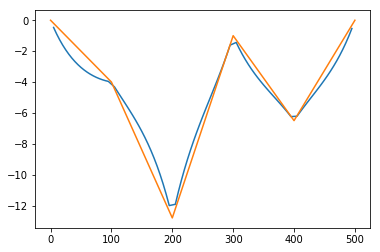

In [9]:
Y=[discretization[i] for i in unknown_indexes]
M=[m[i] for i in range(N-n)]
plt.plot(Y, M)
t = [discretization[i] for i in observation_indexes]
plt.plot(t, depth) 
plt.show()
#espérance conditionnelle en bleu
#données en orange

6. Calculer la matrice de variance conditionnelle et tracer sa diagonale (variance conditionnelle) en fonction de la position. Commenter.

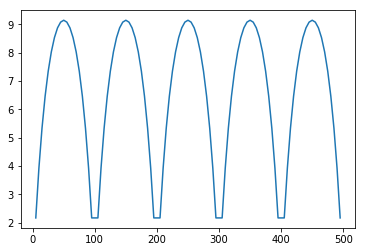

In [10]:
Cov_conditionnelle = C_unknown - np.dot(np.transpose(C_obs_unknown), np.dot(np.linalg.inv(C_observations), C_obs_unknown))
position = [discretization[i] for i in unknown_indexes]
diagonale = [Cov_conditionnelle[i][i] for i in range(N-n)]
plt.plot(position, diagonale)
plt.show()

On remarque deux choses: premièrement tous les 20 points (correspondant à 100 mètres) la covariance tombe à 2, deuxièmement le même motif se répète, translaté de 20 points en 20 points.

La première remarque s'explique par le fait que tous les 20 points, on a une observation. Logiquement, la profondeur d'un point situé à proximité d'une observation n'est pas très éloignée de la profondeur de cette observation. Plus on s'éloigne d'un point connu, plus la profondeur peut s'éloigner de celle du point connu. C'est bien ce qu'on observe sur le graphique.

Par ailleurs la répétition d'un même motif est due au fait que toutes les composantes du vecteur $Z$ suivent la même loi : la seule chose qui distingue les points entre eux est leur distance à l'observation la plus proche d'eux.

7. Effectuer une simulation conditionnelle. Sur un même graphique, tracer la simulation ainsi que les données et l'espérance conditionnelle. Commenter.

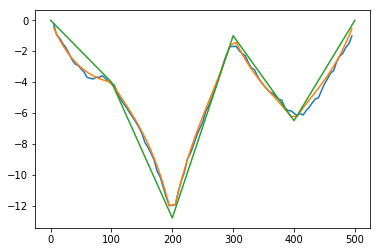

In [11]:
profondeur = np.linspace(0, -30, 100)
def simulation_conditionnelle(nb):
    s = np.zeros(N-n)
    for i in range(nb):                                     #on utilise numpy pour simuler une variable gaussiennenne
        s+=np.random.multivariate_normal(m, Cov_conditionnelle)   #d'éspérance et de matrice de covariance souhaitée
    return s/nb

x = [discretization[i] for i in unknown_indexes]
y = simulation_conditionnelle(100)
plt.plot(x, y) #simulation en bleu
plt.plot(x, m) #espéreance en orange
plt.plot(t, depth) #données en vert
plt.show()

On remarque que les trois courbes sont proches les unes des autres, en particulier la courbe orange (espérance conditionnelle) est cohérente avec les profondeurs mesurées (points non dérivables de la courbe verte). Comme on peut s'y attendre la simulation de l'espérance a la même allure générale que cette dernière, à ceci près que la courbe de l'espérance est bien lisse tandis que celle de la simulation est irrégulière.


8. Ecrire une fonction qui calcule la longueur du câble en fonction du vecteur des profondeurs et du pas de discrétisation.

In [12]:
def longueur_totale(profondeur, pas):
    s = 0
    for i in range(0, len(profondeur)-1):
        s += (pas**2 + (profondeur[i]-profondeur[i+1])**2)**(1/2)
        
    return s

9. Utiliser cette fonction pour calculer la longueur du câble à partir de 100 simulations. Comparer l'espérance conditionnelle (estimée) de la longueur avec la longueur de l'espérance conditionnelle.

In [13]:
def longueur_cable(nb):
    profondeur = np.zeros(N)
    for i, j in enumerate(observation_indexes):            #on initialise avec les points déjà connus, 
        profondeur[j] = depth[i]                        #qui ne varient pas au cours des simulations
    s = 0
    for i in range(nb):
        y = np.random.multivariate_normal(m, Cov_conditionnelle)  #à chaque simulation on fait varier les autres 
        for i, j in enumerate(unknown_indexes):                   #composantes
            profondeur[j] = y[i]
        s += longueur_totale(profondeur, Delta)
    return s/nb
print('avec 100 simulations, on trouve une longueur de ', longueur_cable(100), 'm')
#longueur de l'espérance conditionnelle
profondeur = np.zeros(N)
for i, j in enumerate(observation_indexes):
    profondeur[j] = depth[i]
for i, j in enumerate(unknown_indexes):
        profondeur[j] = m[i]
print("la longueur de l'espérance conditionnelle est ", longueur_totale(profondeur, Delta), 'm')

avec 100 simulations, on trouve une longueur de  522.173943097983 m
la longueur de l'espérance conditionnelle est  501.6468416918411 m


On remarque une différence d'une vingtaine de mètres entre la longueur de l'espérance conditionnelle et l'espérance conditionnelle simulée de la longueur. Ce résultat s'explique par l'allure de l'espréance conditionnelle simulée à la question précédente : nous avions remarqué qu'elle était beaucoup plus irrégulière que la véritable espérance. On comprend bien que lorsqu'on simule une fois le vecteur $Z$, on obtient également un tracé irrégulier. Lorsqu'on calcule sa longueur, comme on travaille en valeur absolue, tous ces "détours" par rapport à l'espérance s'ajoutent les uns aux autres pour donner une longueur totale plus élevée. Comme on est en valeur absolue, faire plusieurs simulations ne permet pas de corriger ce phénomène. 

10. Représenter la suite $M_n$ des moyennes des longueurs de câbles en fonction du nombre de simulations. Commenter.

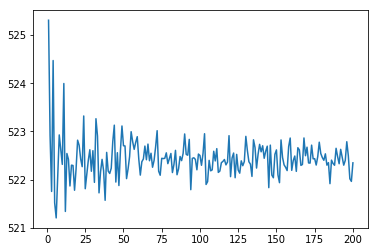

In [14]:
M = [longueur_cable(i) for i in range(1, 201)]
x = np.arange(1, 201)
plt.plot(x, M)
plt.show()

On remarque que la moyenne des longueurs des câbles semble tendre vers une valeur aux alentours de 522 mètres. Avec peu de simulations on a énormément de variations, ces variations diminuent quand le nombre de simulations augmente, ce qui est cohérent.

11. Représenter l'histogramme des longueurs de câbles générées.

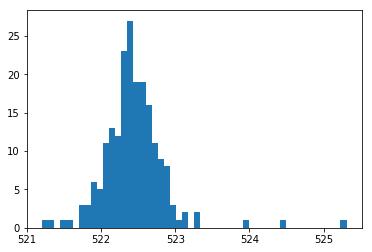

In [15]:
plt.hist(M,50)
plt.show()

12. Donner un intervalle de confiance à 95% de la longueur du câble par 2 méthodes différentes. Commenter.

### 1ere methode :
on approxime l'esperance $\bar{x}$ et la variance $\sigma^2$, avec n simulations (ici n = 100) puis on utilise la formule :

Intervalle de confiance = [$\bar{x} - t_\alpha \frac{\sigma}{\sqrt{n}},\ \bar{x} + t_\alpha \frac{\sigma}{\sqrt{n}}$]

où $t_\alpha \approx 2 $

Utiliser cette formule adaptée aux lois normale a bien un sens car on considère la suite $(Z_i)$ où $Z_i$ est la longueur d'une simulation de $Z$. Chaque simulation étant indépendante des autres, il est raisonnable de supposer les $Z_i$ indépendants, de plus les $Z_i$ sont identiquement distribués. 


wait on fait quoi en fait ?

In [16]:
longueurs = np.array([longueur_cable(100) for i in range(100)])
def moyenne(lg): return(sum(lg)/len(lg))
xbar = moyenne(longueurs)
def ecart_type(lg): return (sum((lg - moyenne(lg))**2)/len(lg))**0.5
sigma = ecart_type(longueurs)
sigma

0.3109671992682231

[]

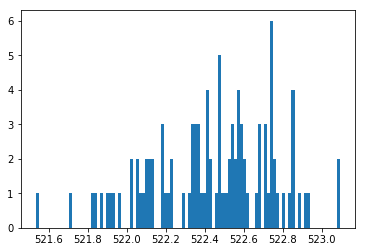

In [17]:
plt.hist(longueurs,100)
plt.plot()

In [18]:
print(f"l'intervalle de confiance à 95% pour la première methode est : [{xbar - 2*sigma/len(longueurs)**0.5}, {xbar + 2*sigma/len(longueurs)**0.5}]")
print(f"soit xbar + [{- 2*sigma/len(longueurs)**0.5}, { 2*sigma/len(longueurs)**0.5}]")

l'intervalle de confiance à 95% pour la première methode est : [522.3758800814611, 522.5002669611684]
soit xbar + [-0.062193439853644616, 0.062193439853644616]


### Methode 2 :
On fait 100 simulations, et on etend l'intervalle en partant de la moyenne jusqu'a avoir 95% des valeurs à l'interieur.

In [19]:
def closest_ind_moy(moy,t):
    c = 0
    d = np.inf
    for i in range(len(t)):
        if abs(t[i]-moy) < d:
            d = abs(t[i] - moy)
            c = i
    return c

longueurs.sort()
ci = closest_ind_moy(xbar, longueurs)
indg = ci
indd = ci
while indd - indg + 1 < 0.95 * len(longueurs):
    if indg > 0 :
        indg -=1
    if indd < len(longueurs) - 1:
        indd +=1
        
print(f"l'intervalle de confiance à 95% pour la deuxième methode est : [{longueurs[indg]}, {longueurs[indd]}]")
print(f"soit xbar + [{longueurs[indg] - xbar}, {longueurs[indd] - xbar}]")

l'intervalle de confiance à 95% pour la deuxième methode est : [521.53335146509, 522.8569118618251]
soit xbar + [-0.9047220562247276, 0.41883834051031954]




13. Donner une estimation de la probabilité que la longueur du câble dépasse 525 m.

In [20]:
n = 0
longueurs = [longueur_cable(1) for i in range(100)]
for i in longueurs:
    if i > 525:
        n+=1
print(f"une estimation de la probabilité que la longueur du câble dépasse 525m est : {n/len(longueurs)}")

une estimation de la probabilité que la longueur du câble dépasse 525m est : 0.18


14. Reprendre les questions précédentes avec 1000, 10000 puis 100000 simulations. Commenter.

### 1000 simulations

l'intervalle de confiance à 95% pour la première methode est : [522.2156309579937, 522.569116233775]
soit xbar + [-0.1767426378906718, 0.1767426378906718]


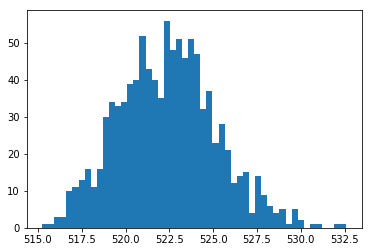

l'intervalle de confiance à 95% pour la deuxième methode est : [517.0654221533111, 527.937248109019]
soit xbar + [-5.326951442573204, 5.544874513134687]


In [21]:
longueurs = np.array([longueur_cable(1) for i in range(1000)])
xbar = moyenne(longueurs)
sigma = ecart_type(longueurs)

print(f"l'intervalle de confiance à 95% pour la première methode est : [{xbar - 2*sigma/len(longueurs)**0.5}, {xbar + 2*sigma/len(longueurs)**0.5}]")
print(f"soit xbar + [{- 2*sigma/len(longueurs)**0.5}, { 2*sigma/len(longueurs)**0.5}]")

longueurs.sort()
ci = closest_ind_moy(xbar, longueurs)
indg = ci
indd = ci
while indd - indg + 1 < 0.95 * len(longueurs):
    if indg > 0 :
        indg -=1
    if indd < len(longueurs) - 1:
        indd +=1
        
plt.hist(longueurs,50)
plt.show()

print(f"l'intervalle de confiance à 95% pour la deuxième methode est : [{longueurs[indg]}, {longueurs[indd]}]")
print(f"soit xbar + [{longueurs[indg] - xbar}, {longueurs[indd] - xbar}]")

In [26]:
n = 0
for i in longueurs:
    if i > 525:
        n+=1
print(f"une estimation de la probabilité que la longueur du câble dépasse 525m est : {n/len(longueurs)}")

une estimation de la probabilité que la longueur du câble dépasse 525m est : 0.1877


### 10000 Simulations

l'intervalle de confiance à 95% pour la première methode est : [522.3786293873658, 522.4941657683013]
soit xbar + [-0.05776819046775381, 0.05776819046775381]


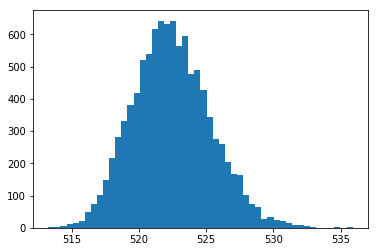

l'intervalle de confiance à 95% pour la deuxième methode est : [517.8676169553383, 531.0941101854411]
soit xbar + [-4.568780622495183, 8.65771260760755]


In [27]:
longueurs = np.array([longueur_cable(1) for i in range(10000)])
xbar = moyenne(longueurs)
sigma = ecart_type(longueurs)

print(f"l'intervalle de confiance à 95% pour la première methode est : [{xbar - 2*sigma/len(longueurs)**0.5}, {xbar + 2*sigma/len(longueurs)**0.5}]")
print(f"soit xbar + [{- 2*sigma/len(longueurs)**0.5}, { 2*sigma/len(longueurs)**0.5}]")

longueurs.sort()
ci = closest_ind_moy(xbar, longueurs)
indg = ci
indd = ci
while indd - indg + 1 < 0.95 * len(longueurs):
    if indg > 0 :
        indg -=1
    if indd < len(longueurs) - 1:
        indd +=1

plt.hist(longueurs,50)
plt.show()

print(f"l'intervalle de confiance à 95% pour la deuxième methode est : [{longueurs[indg]}, {longueurs[indd]}]")
print(f"soit xbar + [{longueurs[indg] - xbar}, {longueurs[indd] - xbar}]")

In [28]:
n = 0
for i in longueurs:
    if i > 525:
        n+=1
print(f"une estimation de la probabilité que la longueur du câble dépasse 525m est : {n/len(longueurs)}")

une estimation de la probabilité que la longueur du câble dépasse 525m est : 0.1825


### 100000 simulations

l'intervalle de confiance à 95% pour la première methode est : [522.4020835012968, 522.4386989972677]
soit xbar + [-0.0183077479854247, 0.0183077479854247]


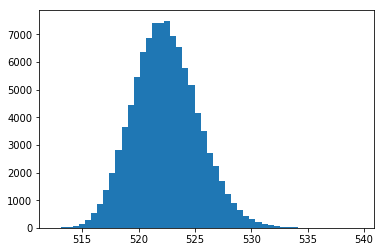

l'intervalle de confiance à 95% pour la deuxième methode est : [517.6559444199434, 529.926201117304]
soit xbar + [-4.764446829338908, 7.505809868021743]


In [29]:
longueurs = np.array([longueur_cable(1) for i in range(100000)])
xbar = moyenne(longueurs)
sigma = ecart_type(longueurs)

print(f"l'intervalle de confiance à 95% pour la première methode est : [{xbar - 2*sigma/len(longueurs)**0.5}, {xbar + 2*sigma/len(longueurs)**0.5}]")
print(f"soit xbar + [{- 2*sigma/len(longueurs)**0.5}, { 2*sigma/len(longueurs)**0.5}]")

longueurs.sort()
ci = closest_ind_moy(xbar, longueurs)
indg = ci
indd = ci
while indd - indg + 1 < 0.95 * len(longueurs):
    if indg > 0 :
        indg -=1
    if indd < len(longueurs) - 1:
        indd +=1
        
plt.hist(longueurs,50)
plt.show()

print(f"l'intervalle de confiance à 95% pour la deuxième methode est : [{longueurs[indg]}, {longueurs[indd]}]")
print(f"soit xbar + [{longueurs[indg] - xbar}, {longueurs[indd] - xbar}]")

In [30]:
n = 0
for i in longueurs:
    if i > 525:
        n+=1
print(f"une estimation de la probabilité que la longueur du câble dépasse 525m est : {n/len(longueurs)}")

une estimation de la probabilité que la longueur du câble dépasse 525m est : 0.18217


J'ai appelé longueur_cable avec l'argument 1, car nous avons ainsi une distribution réelle, et les calculs sont beaucoup plus rapides, mais alors la methode 1 ne marche plus vraiment, car on ne peut plus utiliser le théorème centrale limite pour dire que ce que l'on calule ressemble à une loi normale. La methode 2 est alors plus fiable, car nous alors 95% +- 2/n valeurs sont dans l'intervalle donné.